In [226]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import holidays

In [227]:
df = pd.read_excel("/Users/neseuygun/Desktop/data/exchange_rate_usd.xlsx")
df

,Date,USD_TL
0,01-01-2020,NaN
1,02-01-2020,5.9507
2,03-01-2020,5.9585
3,04-01-2020,NaN
4,05-01-2020,NaN
...,...,...
1317,10-08-2023,27.0378
1318,11-08-2023,27.0464
1319,12-08-2023,NaN
1320,13-08-2023,NaN


## EDA before handling with missing values

In [228]:
df.dtypes

Date       object
USD_TL    float64
dtype: object

In [229]:
df["Date"] = df["Date"].apply(lambda x: datetime.strptime(x, "%d-%m-%Y"))
df.dtypes

Date      datetime64[ns]
USD_TL           float64
dtype: object

In [230]:
df.head()

,Date,USD_TL
0,2020-01-01,NaN
1,2020-01-02,5.9507
2,2020-01-03,5.9585
3,2020-01-04,NaN
4,2020-01-05,NaN


In [231]:
df.sort_values(by="Date", inplace=True)

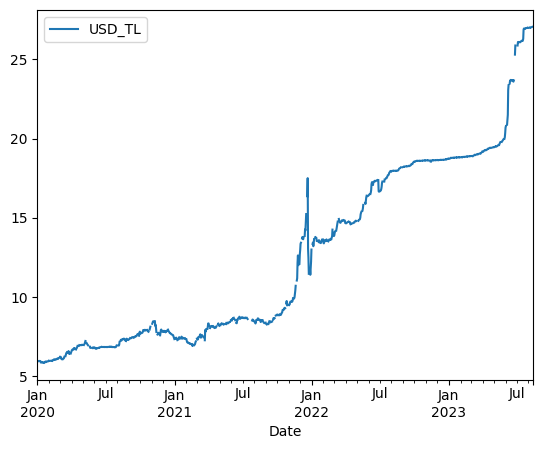

In [232]:
#Let us see data visualization
df.plot(x="Date", y="USD_TL")
plt.show()

In [233]:
#check the number of missing values
df.isna().sum()


Date        0
USD_TL    414
dtype: int64

In [234]:
#Firstly, we will look at how many null values there are on which days.
df["Day"] = df["Date"].apply(lambda x: datetime.strftime(x, "%A"))
df[df["USD_TL"].isnull()]["Day"].value_counts()

Day
Saturday     189
Sunday       189
Friday        11
Thursday       7
Wednesday      6
Tuesday        6
Monday         6
Name: count, dtype: int64

In [235]:
# we need to know if the missing values are belong to public holiday or not. 
df["Public_Holiday"] = ["Puplic holiday" if i in  holidays.Turkey() else "Work day" for i in df.Date]


In [236]:
df

,Date,USD_TL,Day,Public_Holiday
0,2020-01-01,NaN,Wednesday,Puplic holiday
1,2020-01-02,5.9507,Thursday,Work day
2,2020-01-03,5.9585,Friday,Work day
3,2020-01-04,NaN,Saturday,Work day
4,2020-01-05,NaN,Sunday,Work day
...,...,...,...,...
1317,2023-08-10,27.0378,Thursday,Work day
1318,2023-08-11,27.0464,Friday,Work day
1319,2023-08-12,NaN,Saturday,Work day
1320,2023-08-13,NaN,Sunday,Work day


In [237]:

df[df.Public_Holiday == "Puplic holiday"]

,Date,USD_TL,Day,Public_Holiday
0,2020-01-01,NaN,Wednesday,Puplic holiday
113,2020-04-23,NaN,Thursday,Puplic holiday
121,2020-05-01,NaN,Friday,Puplic holiday
139,2020-05-19,NaN,Tuesday,Puplic holiday
144,2020-05-24,NaN,Sunday,Puplic holiday
145,2020-05-25,NaN,Monday,Puplic holiday
146,2020-05-26,NaN,Tuesday,Puplic holiday
196,2020-07-15,NaN,Wednesday,Puplic holiday
212,2020-07-31,NaN,Friday,Puplic holiday
213,2020-08-01,NaN,Saturday,Puplic holiday


In [238]:
len(df[df.Public_Holiday == "Puplic holiday"])

53

In [239]:
# We need to exclude weekends from public holidays
df_new = df[~df["Day"].isin(["Saturday", "Sunday"])]

In [240]:
#After removing weekends we have 36 null values belongs to public holidays. before we have 414 null values that 378 out of them belongs to weekends.
# 414-378=36 and we are able to see all missing values are public holidays
missing_values = df_new[df_new["USD_TL"].isnull()]
missing_values = missing_values["Public_Holiday"].value_counts()

print(missing_values)
print(df_new.isnull().sum()) #dataframe after removing weekends

Public_Holiday
Puplic holiday    36
Name: count, dtype: int64
Date               0
USD_TL            36
Day                0
Public_Holiday     0
dtype: int64


# Handling with missing values

In [241]:
#Now let's see the rate of missing values
missing_percentage = ((df["USD_TL"].isnull().sum())/(df.Date.size))*100
missing_percentage

31.316187594553707

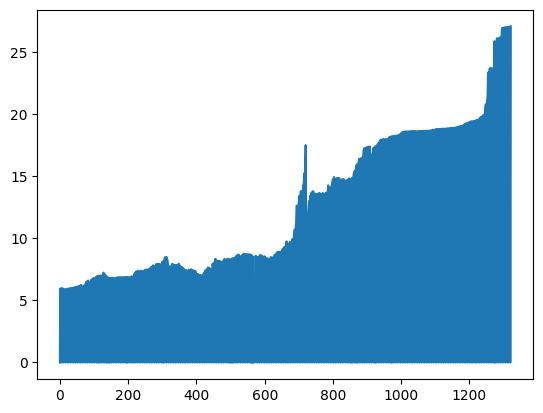

In [242]:
# 1. Fill the missing values with zeros. We do not prefer this.
df_firstmethod= df["USD_TL"].fillna(0)

df_firstmethod.plot(x="Date", y="USD_TL")
plt.show()

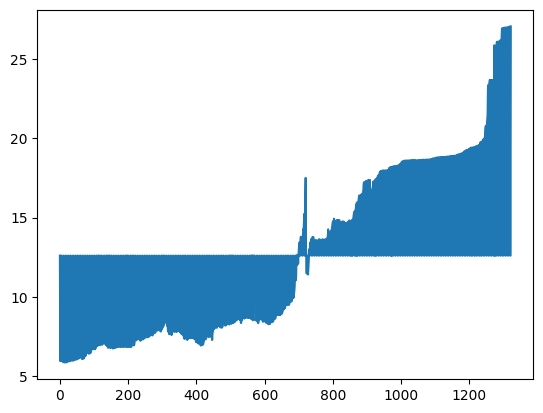

In [243]:
#2. Fill the missing values with mean. We do not prefer this in time series.
df_secondmethod = df["USD_TL"].fillna(df["USD_TL"].mean())

df_secondmethod.plot(x="Date", y="USD_TL")
plt.show()

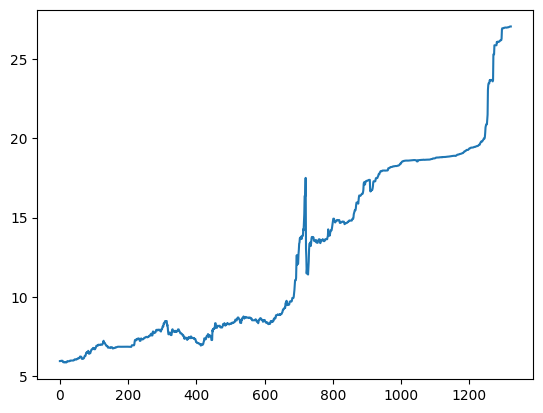

In [244]:
#3. Fill the missing values with bfill() method that replaces the NULL values with the values from the next row. It makes sense.
df_thirdmethod = df["USD_TL"].fillna(df["USD_TL"].bfill())

df_thirdmethod.plot(x="Date", y="USD_TL")
plt.show()

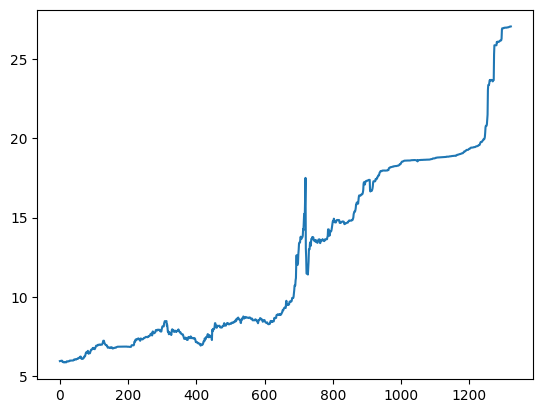

In [245]:
#4. Fill the missing values with bfill() method that replaces the NULL values with the value from the previous row It makes sense.
df_forthmethod = df["USD_TL"].fillna(df["USD_TL"].ffill())

df_forthmethod.plot(x="Date", y="USD_TL")
plt.show()

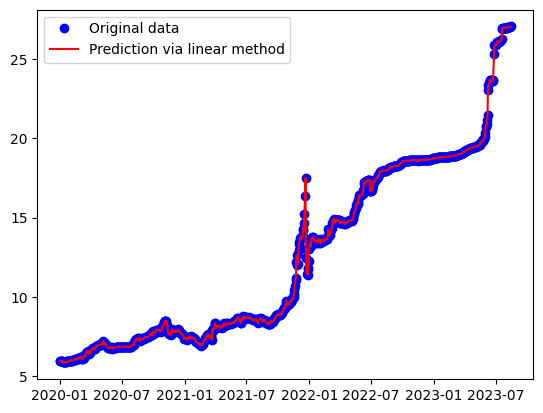

In [258]:
#5. Fill the missing values using interpolation method that is prefered much more.
#It uses various interpolation technique -- method : {‘linear’, ‘time’, ‘index’, ‘values’, ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘barycentric’, ‘krogh’, ‘polynomial’, ‘spline’, ‘piecewise_polynomial’, ‘from_derivatives’, ‘pchip’, ‘akima’}
df_fifth= df.set_index("Date")
df_fifthhmethod = df_fifth["USD_TL"].interpolate(method="linear")

plt.plot(df_fifth["USD_TL"], "bo", label="Original data")
plt.plot(df_fifthhmethod, "r-", label= "Prediction via linear method")
plt.legend()
plt.show()

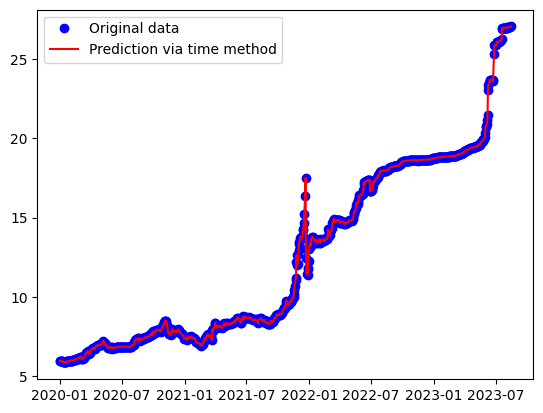

In [259]:
df_sixth= df.set_index("Date")
df_sixthmethod = df_sixth["USD_TL"].interpolate(method="time")

plt.plot(df_sixth["USD_TL"], "bo", label="Original data")
plt.plot(df_sixthmethod, "r-", label= "Prediction via time method")
plt.legend()
plt.show()